# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set a counter for city index
index_count = 0

# establish initial lists for our dataframe
City_ID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# loop thru API call and pull data for each city
for city in cities:
    # try/except call to open weather api to pull data for each city
    try:
        # api call
        response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
        results=response.json()
        
        # add 1 to count to city count for each iteration
        index_count += 1
        
        # append data to our DF
        City_ID.append(results['id'])
        City.append(results['name'])
        Cloudiness.append(results['clouds']['all'])
        Country.append(results['sys']['country'])
        Date.append(results['dt'])
        Humidity.append(results['main']['humidity'])
        Lat.append(results['coord']['lat'])
        Lng.append(results['coord']['lon'])
        Max_Temp.append(results['main']['temp_max'])
        Wind_Speed.append(results['wind']['speed'])
        
        # Print log of each city as it's being processed
        print(f'City Name: {city} - City Number: {index_count}')
       
        
    except:
        # print value if not found
        print('City not Found, skipping...')

City Name: nikolskoye - City Number: 1
City Name: ushuaia - City Number: 2
City Name: atuona - City Number: 3
City Name: rikitea - City Number: 4
City Name: takoradi - City Number: 5
City Name: aykhal - City Number: 6
City Name: upernavik - City Number: 7
City Name: kodiak - City Number: 8
City not Found, skipping...
City Name: avarua - City Number: 10
City Name: kuytun - City Number: 11
City Name: florianopolis - City Number: 12
City Name: hithadhoo - City Number: 13
City Name: mar del plata - City Number: 14
City Name: inhambane - City Number: 15
City Name: vaini - City Number: 16
City Name: aloleng - City Number: 17
City Name: georgetown - City Number: 18
City Name: pitimbu - City Number: 19
City Name: cascais - City Number: 20
City Name: quatre cocos - City Number: 21
City Name: da lat - City Number: 22
City Name: mayachnyy - City Number: 23
City Name: kruisfontein - City Number: 24
City Name: esperance - City Number: 25
City Name: cape town - City Number: 26
City Name: hermanus - 

City Name: atar - City Number: 217
City Name: inta - City Number: 218
City Name: rize - City Number: 219
City Name: pa sang - City Number: 220
City Name: matara - City Number: 221
City Name: tabuk - City Number: 222
City Name: merrill - City Number: 223
City Name: rayong - City Number: 224
City not Found, skipping...
City Name: ayr - City Number: 226
City Name: rio bueno - City Number: 227
City Name: bhan - City Number: 228
City Name: marsa matruh - City Number: 229
City Name: bengkulu - City Number: 230
City not Found, skipping...
City Name: ancud - City Number: 232
City Name: la romana - City Number: 233
City Name: cherskiy - City Number: 234
City not Found, skipping...
City Name: shimoda - City Number: 236
City Name: tonj - City Number: 237
City Name: ternate - City Number: 238
City Name: sirnak - City Number: 239
City Name: virginia beach - City Number: 240
City Name: alice springs - City Number: 241
City Name: moree - City Number: 242
City Name: sinnamary - City Number: 243
City N

City not Found, skipping...
City not Found, skipping...
City Name: rawson - City Number: 434
City not Found, skipping...
City Name: howard springs - City Number: 436
City Name: dragoman - City Number: 437
City not Found, skipping...
City not Found, skipping...
City Name: birao - City Number: 440
City Name: redlands - City Number: 441
City Name: tura - City Number: 442
City not Found, skipping...
City Name: san cristobal - City Number: 444
City Name: sabang - City Number: 445
City Name: gorontalo - City Number: 446
City not Found, skipping...
City Name: kandrian - City Number: 448
City Name: tubuala - City Number: 449
City Name: xiongzhou - City Number: 450
City not Found, skipping...
City Name: lagos - City Number: 452
City Name: catuday - City Number: 453
City Name: zambezi - City Number: 454
City Name: chickasha - City Number: 455
City Name: marshall - City Number: 456
City not Found, skipping...
City Name: great yarmouth - City Number: 458
City Name: buchanan - City Number: 459
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#convert the lists into one dataframe
weather_df=pd.DataFrame([City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed])
weather_df=weather_df.transpose()
weather_df.columns = ['City ID', 'City', 'Cloudiness','Country', 'Date', 'Humidity','Lat','Lng',
                      'Max Temp', 'Wind Speed']
weather_df

#export the dataframe into a .csv file
weather_df.to_csv('output_data/weather.csv', index=False)
pd.read_csv('output_data/weather.csv')

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,546105,Nikolskoye,75,RU,1612210059,86,59.7035,30.7861,26.60,6.71
1,3833367,Ushuaia,40,AR,1612210059,66,-54.8000,-68.3000,51.80,34.52
2,4020109,Atuona,13,PF,1612210060,78,-9.8000,-139.0333,78.04,18.50
3,4030556,Rikitea,100,PF,1612210060,76,-23.1203,-134.9692,78.55,16.73
4,2294915,Takoradze,100,GH,1612210061,84,4.8845,-1.7554,80.13,11.10
...,...,...,...,...,...,...,...,...,...,...
556,3194099,Opatija,20,HR,1612210663,76,45.3392,14.3083,46.40,3.44
557,2021613,Krasnorechenskiy,62,RU,1612210663,83,44.6265,135.3532,-12.37,15.55
558,552465,Kargopol',82,RU,1612210664,97,61.5071,38.9456,15.22,5.77
559,6355222,Yulara,48,AU,1612210664,36,-25.2406,130.9889,78.80,16.11


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
#humidity=[]
#for city in weather_df:
 #   if index=weather_df.loc[weather_df['Humidity']>100].index
   # humidity.append(index)
#humidity


#  Get the indices of cities that have humidity over 100%.
#need to determine if this is looking at all rows?
index = weather_df.loc[weather_df['Humidity']>100].index
index


Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


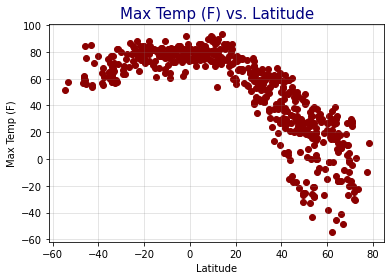

In [19]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], color='darkred')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 2,
                     'color' : 'navy'})
plt.show()


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression